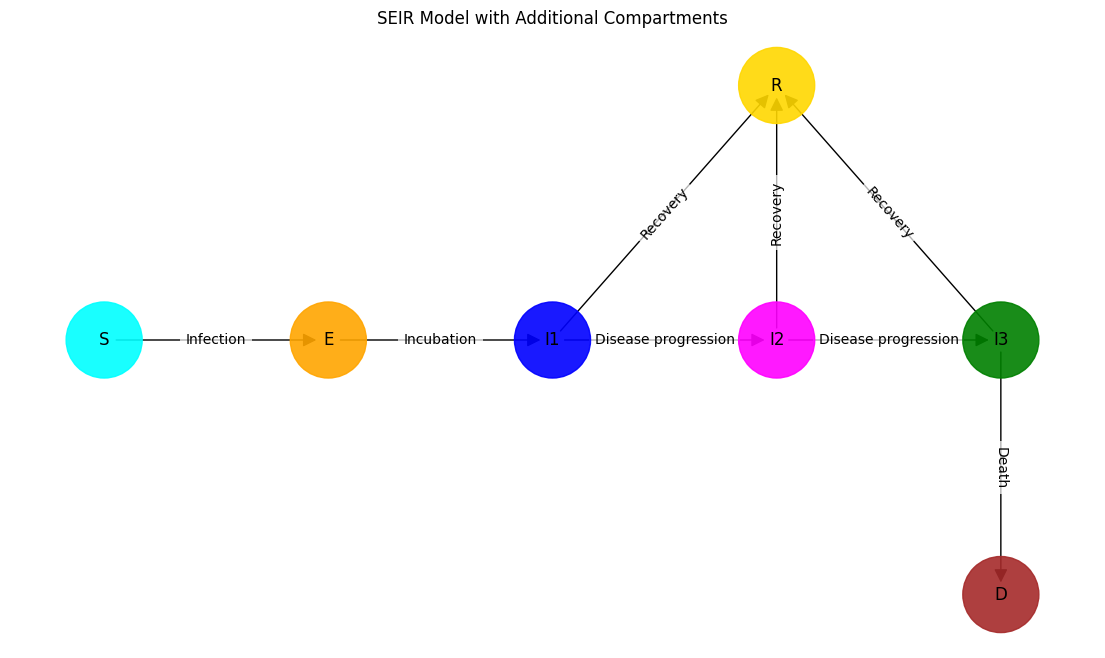

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their positions and colors
nodes = {
    'S': {'pos': (0, 0), 'color': 'cyan'},
    'E': {'pos': (1, 0), 'color': 'orange'},
    'I1': {'pos': (2, 0), 'color': 'blue'},
    'I2': {'pos': (3, 0), 'color': 'magenta'},
    'I3': {'pos': (4, 0), 'color': 'green'},
    'R': {'pos': (3, 1), 'color': 'gold'},
    'D': {'pos': (4, -1), 'color': 'brown'}
}

for node, attr in nodes.items():
    G.add_node(node, pos=attr['pos'], color=attr['color'])

# Add edges with labels
edges = [
    ('S', 'E', 'Infection'),
    ('E', 'I1', 'Incubation'),
    ('I1', 'I2', 'Disease progression'),
    ('I2', 'I3', 'Disease progression'),
    ('I1', 'R', 'Recovery'),
    ('I2', 'R', 'Recovery'),
    ('I3', 'R', 'Recovery'),
    ('I3', 'D', 'Death')
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Get positions and colors for the nodes
pos = nx.get_node_attributes(G, 'pos')
colors = [attr['color'] for attr in nodes.values()]

# Increase the plot size
plt.figure(figsize=(14, 8))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=3000, alpha=0.9)

# Draw the edges
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Draw the edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Display the graph
plt.title('SEIR Model with Additional Compartments')
plt.axis('off')  # Turn off the axis
plt.show()


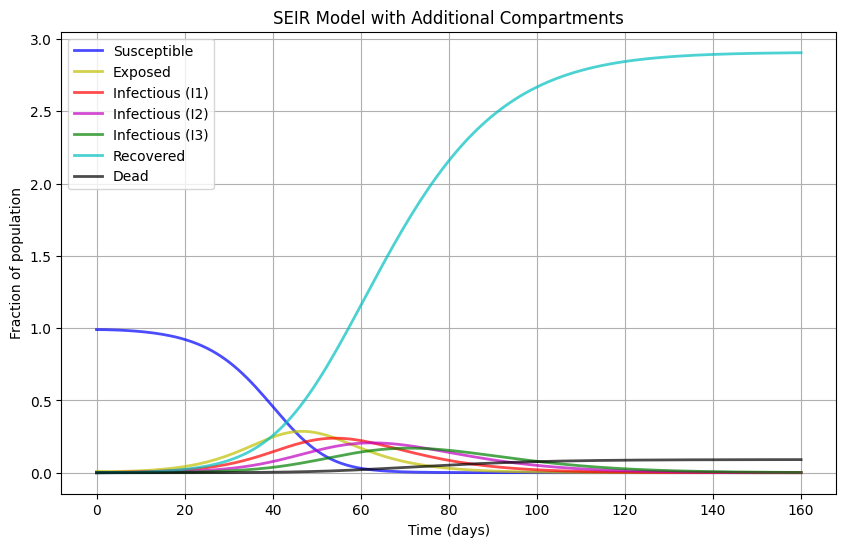

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations for the SEIR model with additional compartments
def seir_model(y, t, beta, sigma, gamma1, gamma2, gamma3, mu):
    S, E, I1, I2, I3, R, D = y

    dS_dt = -beta * S * (I1 + I2 + I3)
    dE_dt = beta * S * (I1 + I2 + I3) - sigma * E
    dI1_dt = sigma * E - gamma1 * I1
    dI2_dt = gamma1 * I1 - gamma2 * I2
    dI3_dt = gamma2 * I2 - gamma3 * I3 - mu * I3
    dR_dt = gamma3 * I3 + gamma2 * I2 + gamma1 * I1
    dD_dt = mu * I3

    return [dS_dt, dE_dt, dI1_dt, dI2_dt, dI3_dt, dR_dt, dD_dt]

# Initial number of individuals in each compartment
S0 = 0.99  # Initial susceptible population
E0 = 0.01  # Initial exposed population
I10 = 0.0  # Initial infectious population (I1)
I20 = 0.0  # Initial infectious population (I2)
I30 = 0.0  # Initial infectious population (I3)
R0 = 0.0   # Initial recovered population
D0 = 0.0   # Initial dead population

# Initial conditions vector
y0 = [S0, E0, I10, I20, I30, R0, D0]

# Contact rate, incubation rate, recovery rates, and death rate
beta = 0.3    # Infection rate
sigma = 0.1   # Rate of progression from exposed to infectious (I1)
gamma1 = 0.1  # Recovery rate from I1
gamma2 = 0.1  # Recovery rate from I2
gamma3 = 0.1  # Recovery rate from I3
mu = 0.01     # Death rate from I3

# Time points (in days)
t = np.linspace(0, 160, 160)

# Integrate the SEIR equations over the time grid, t
result = odeint(seir_model, y0, t, args=(beta, sigma, gamma1, gamma2, gamma3, mu))
S, E, I1, I2, I3, R, D = result.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
plt.plot(t, I1, 'r', alpha=0.7, linewidth=2, label='Infectious (I1)')
plt.plot(t, I2, 'm', alpha=0.7, linewidth=2, label='Infectious (I2)')
plt.plot(t, I3, 'g', alpha=0.7, linewidth=2, label='Infectious (I3)')
plt.plot(t, R, 'c', alpha=0.7, linewidth=2, label='Recovered')
plt.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

plt.xlabel('Time (days)')
plt.ylabel('Fraction of population')
plt.legend()
plt.title('SEIR Model with Additional Compartments')
plt.grid(True)
plt.show()
